<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-22 02:33:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  60.2MB/s    in 3.3s    

2025-09-22 02:33:40 (60.4 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [9]:
df = pd.read_sql_query("SELECT * FROM main;", conn)
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


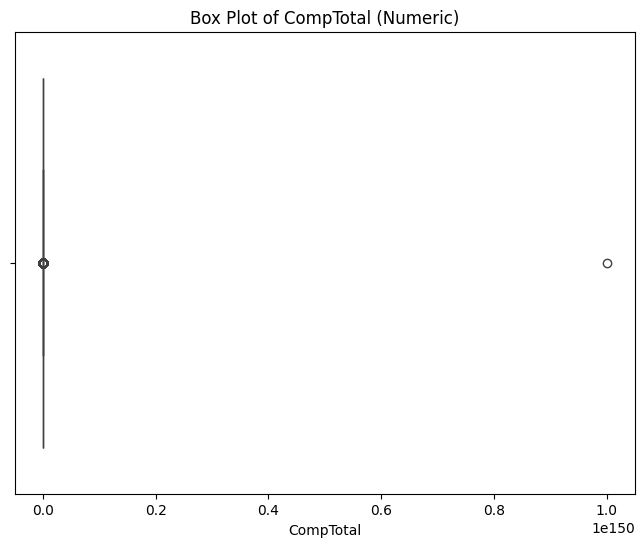

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=df['CompTotal'])
plt.title("Box Plot of CompTotal (Numeric)")
plt.xlabel("CompTotal")
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


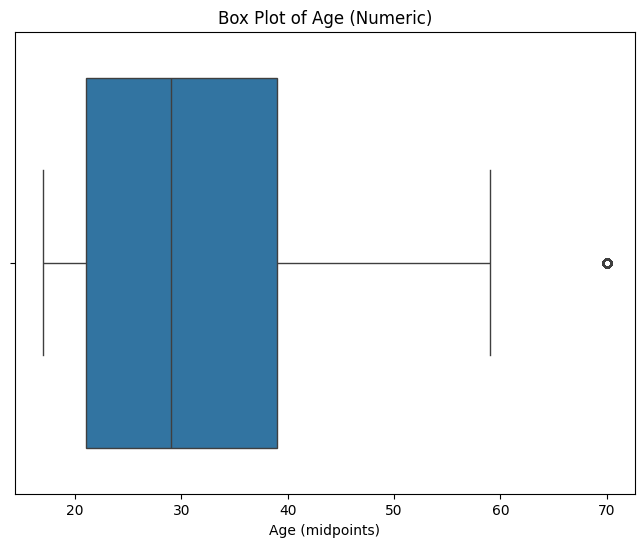

In [13]:

# Example mapping (adjust if needed)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# Replace categories with numeric midpoints
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows where mapping didn’t apply (like "Prefer not to say")
df_clean = df.dropna(subset=['Age_numeric'])

# Plot box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=df_clean['Age_numeric'])
plt.title("Box Plot of Age (Numeric)")
plt.xlabel("Age (midpoints)")
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


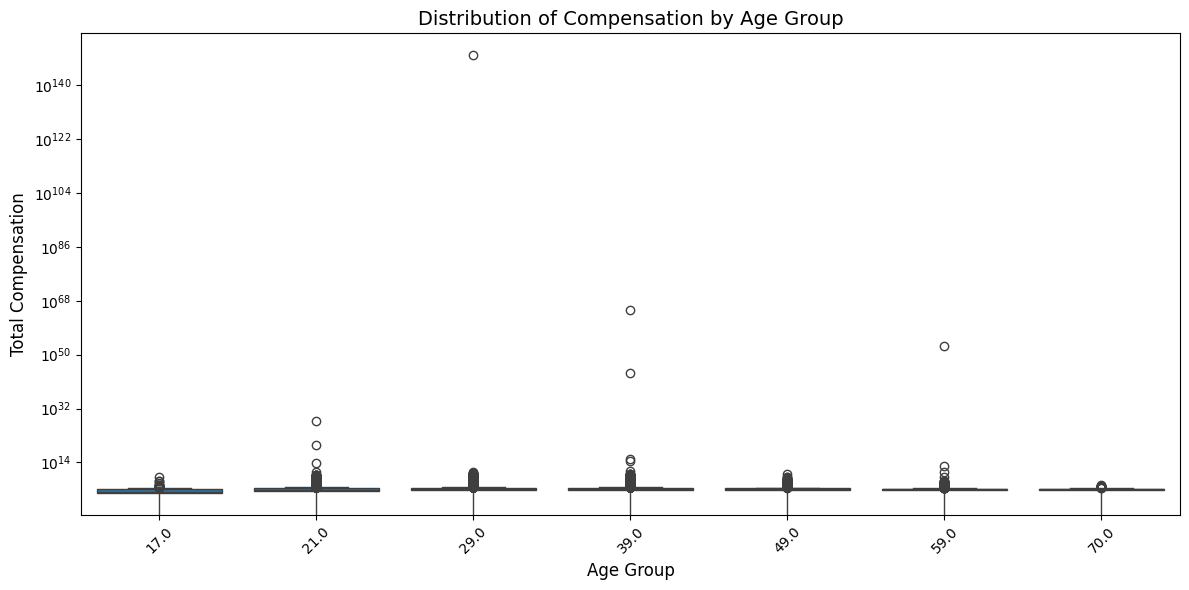

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing CompTotal or Age
df_box = df.dropna(subset=['CompTotal', 'Age_numeric'])

# Create box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_box, x='Age_numeric', y='CompTotal')

plt.title("Distribution of Compensation by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Total Compensation", fontsize=12)
plt.xticks(rotation=45)  # rotate for readability
plt.yscale("log")        # optional: log scale if compensation is highly skewed

plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_1327/2466114734.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_box['JobSat_bin'] = pd.cut(df_box['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)


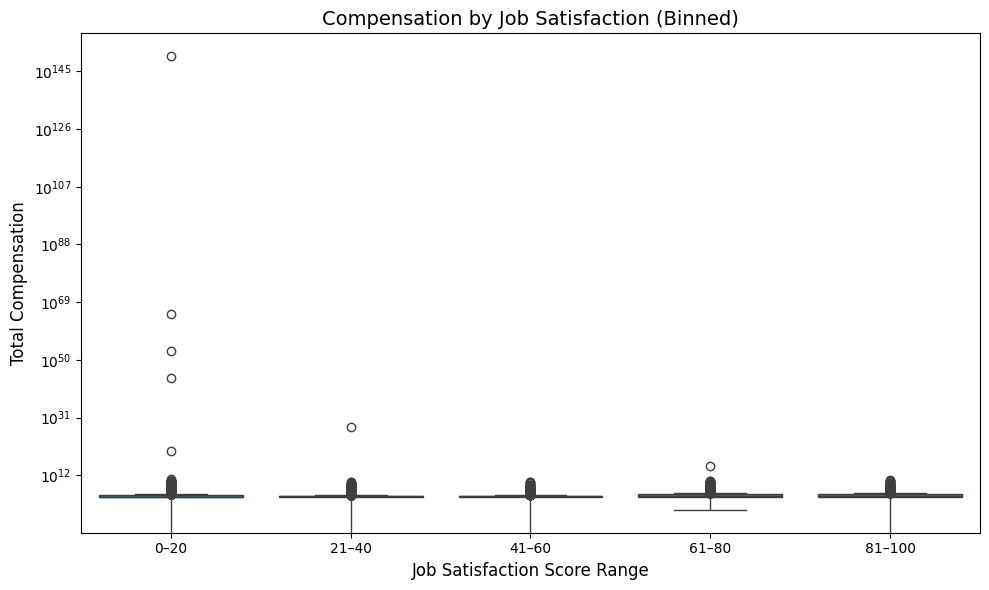

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop missing
df_box = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

# Bin job satisfaction into categories
bins = [0, 20, 40, 60, 80, 100]
labels = ["0–20", "21–40", "41–60", "61–80", "81–100"]
df_box['JobSat_bin'] = pd.cut(df_box['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_box, x='JobSat_bin', y='CompTotal')

plt.title("Compensation by Job Satisfaction (Binned)", fontsize=14)
plt.xlabel("Job Satisfaction Score Range", fontsize=12)
plt.ylabel("Total Compensation", fontsize=12)
plt.yscale("log")   # skew handling
plt.tight_layout()
plt.show()



### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


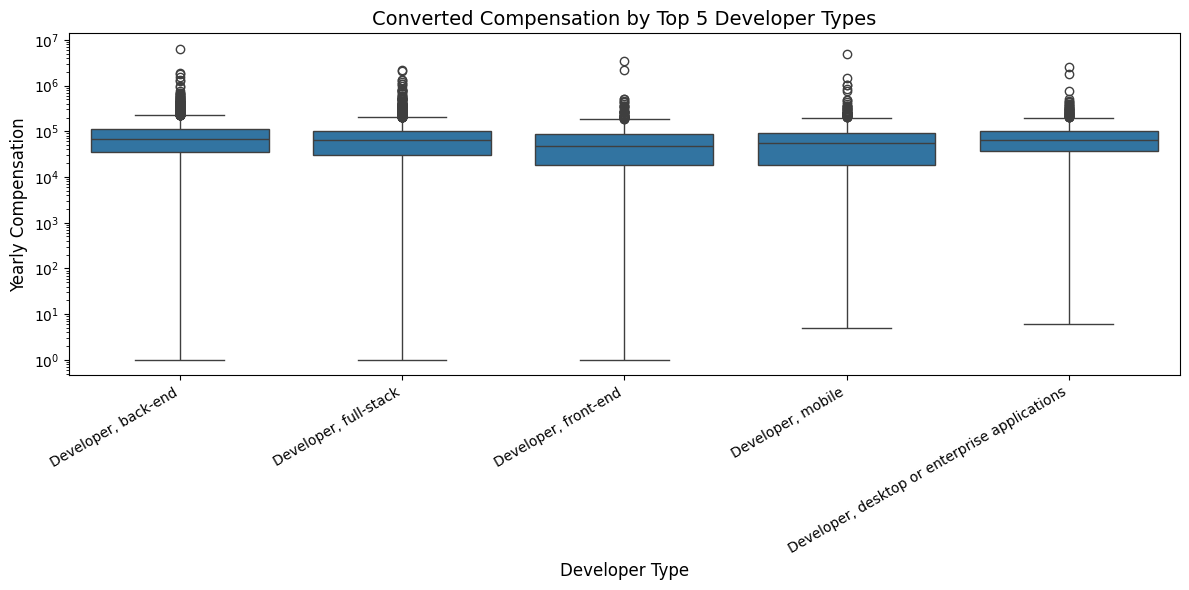

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drop missing compensation or DevType
df_box = df.dropna(subset=['ConvertedCompYearly', 'DevType'])

# Split multiple developer types into separate rows
df_dev = df_box.assign(DevType=df_box['DevType'].str.split(';')).explode('DevType')

# Get top 5 developer types
top5_devtypes = df_dev['DevType'].value_counts().head(5).index

# Filter dataset for top 5 only
df_top5 = df_dev[df_dev['DevType'].isin(top5_devtypes)]

# Create box plot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top5, x='DevType', y='ConvertedCompYearly')

plt.title("Converted Compensation by Top 5 Developer Types", fontsize=14)
plt.xlabel("Developer Type", fontsize=12)
plt.ylabel("Yearly Compensation", fontsize=12)
plt.yscale("log")   # log scale to handle skew
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_1327/3735051376.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['Country'] = df_top5['Country'].replace(country_mapping)


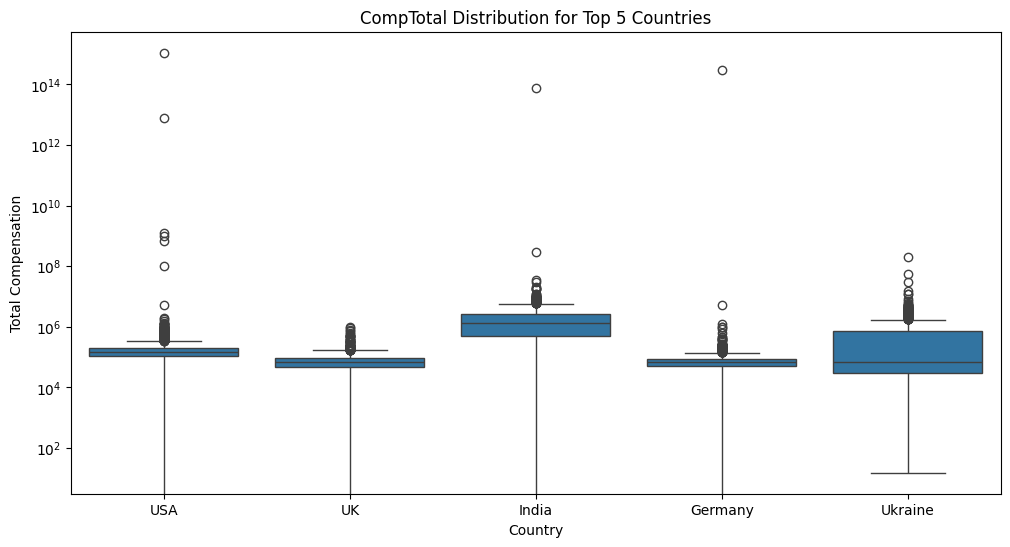

In [22]:
# Create a mapping for shorter names
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK'
}

# Apply mapping to the Country column
df_top5['Country'] = df_top5['Country'].replace(country_mapping)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_top5)
plt.title('CompTotal Distribution for Top 5 Countries')
plt.ylabel('Total Compensation')
plt.xlabel('Country')
plt.yscale('log')  # Optional: use log scale if there are extreme outliers
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


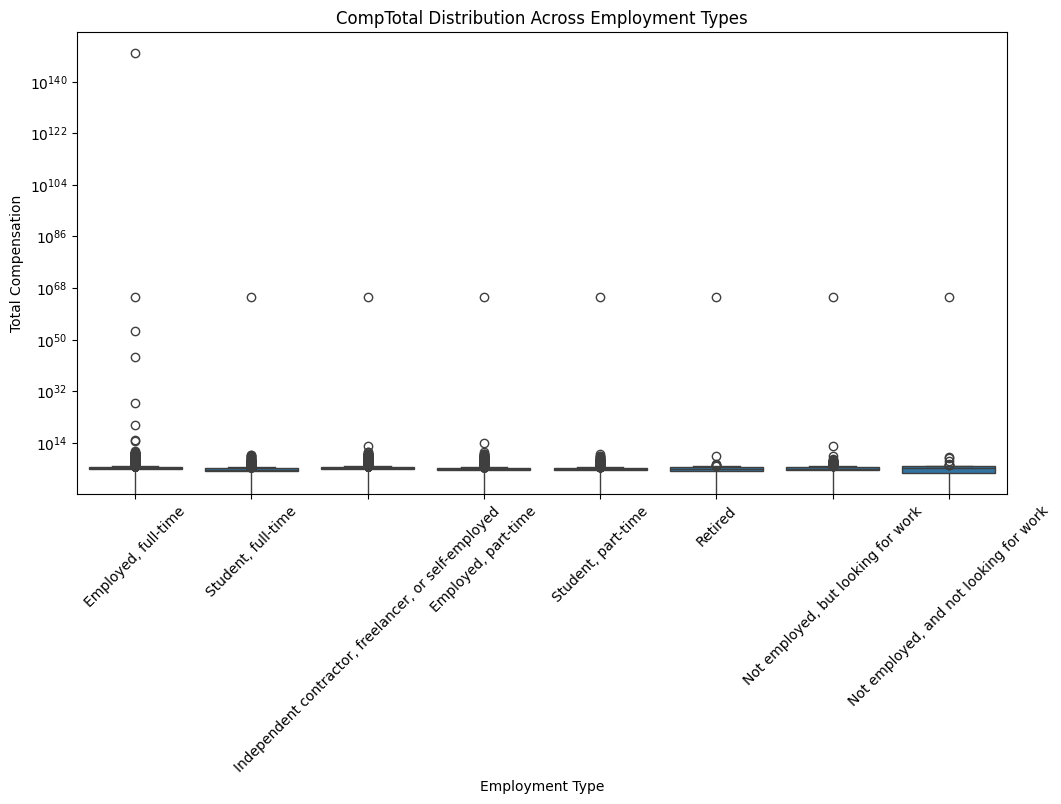

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Prepare Data
# -----------------------------
# Drop rows with missing Employment
df_emp = df.dropna(subset=['Employment']).copy()

# Split multiple employment types into separate rows
df_emp['Employment'] = df_emp['Employment'].str.split(';')  # replace ';' if your data uses ','
df_emp = df_emp.explode('Employment').reset_index(drop=True)  # reset index to avoid duplicates

# Clean up whitespace
df_emp['Employment'] = df_emp['Employment'].str.strip()

# Ensure CompTotal is numeric and drop invalid rows
df_emp['CompTotal'] = pd.to_numeric(df_emp['CompTotal'], errors='coerce')
df_emp = df_emp.dropna(subset=['CompTotal'])

# -----------------------------
# Step 2: Create Box Plot
# -----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Employment', y='CompTotal', data=df_emp)
plt.title('CompTotal Distribution Across Employment Types')
plt.ylabel('Total Compensation')
plt.xlabel('Employment Type')
plt.yscale('log')  # optional for extreme outliers
plt.xticks(rotation=45)
plt.show()



**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


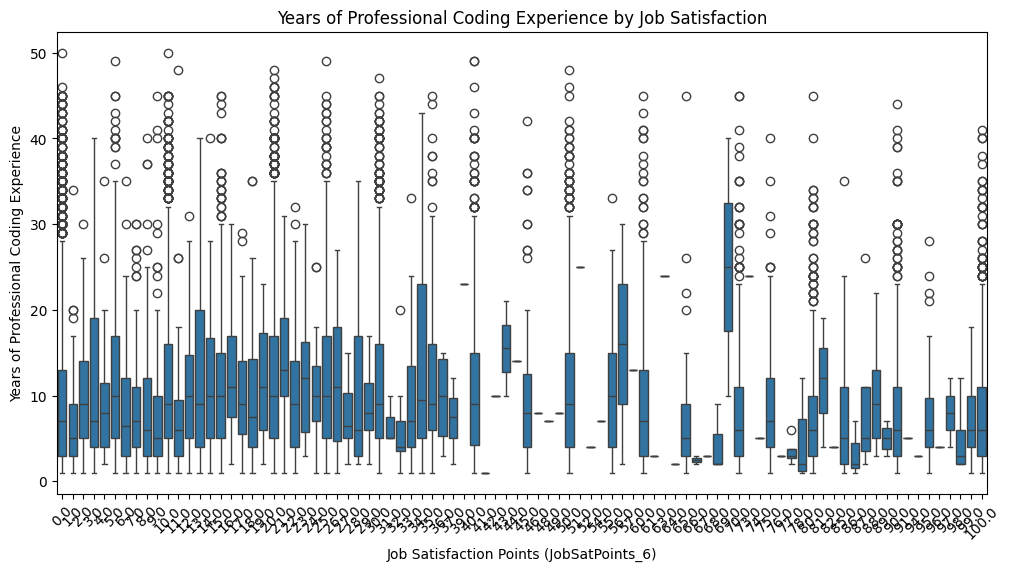

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Prepare Data
# -----------------------------
# Drop rows with missing values in YearsCodePro or JobSatPoints_6
df_code = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6']).copy()

# Ensure YearsCodePro is numeric
df_code['YearsCodePro'] = pd.to_numeric(df_code['YearsCodePro'], errors='coerce')
df_code = df_code.dropna(subset=['YearsCodePro'])

# Round JobSatPoints_6 if needed (optional)
df_code['JobSatPoints_6'] = df_code['JobSatPoints_6'].round()

# -----------------------------
# Step 2: Create Box Plot
# -----------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df_code)
plt.title('Years of Professional Coding Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction Points (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
